__Goal: distinguish electrophysiological type of cell based on characteristics measured during experiments.__
I am using data which were acquired by me in the lab. I am trying to perform cluster analysis to see if electrophysiological type can be guessed. 

Neurophysiologists tries to group cells  based on their electrphysiology characteristics. The divisions into groups differ a lot  - some take into account more features or include more cell types. For gaining quick insight about the various groupings you might see this notes I prepared for myself some time ago. 
https://nbviewer.jupyter.org/gist/matrama/8b3544126218e605274272f6478087ef

You see that the most basic division is in between FS (Fast Spiking) and RS (Regular Spiking) cells, or eventually with addition to LTS (Low Threshold Spiking)(Berein et all 2003). 
This division I also applied during my by-eye assessment, which is included in the data frame I am using below. 
The numeric data I have in the data frame comes from analysis of spiking evoked by injecting increasing current steps to the cell during each recording (standard procedure).
In general it is really easy to see FS cell (they are rare usually 5-10% of recordings). They elicits spikes with high frequency, do not have any adaptation, their fAHP (fast after-hyperpolarization) do not change in amplitude and dynamics. The RS and LTS are much more similar to each other and harder to distinguish. The feature 'change'(the difference in the value of first and last fAHP) should be a good predictor for that.

I would like to see if I can group the cells in resonable groups using cluster analysis (here with pca).
__First, I would like to be able to distinguish between FS and RS (LTS we treat in this case as RS cells).__
But they are much less frequent (I estimated that there is 7 FS cells in my data base, which is actually 10 % of all cells).


Below the best in my opinion result I got.
I have problem with assessing how good it is and how to check it. What can be done better?





In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/smhan/Downloads/smh'

In [3]:
df=pd.read_csv("cell_type_analysis.csv", sep=';', header=0, decimal=',')



In [4]:
df.head()

,﻿date,cell number,cczb or ivb file name form which I have took the data,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,...,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step,by eye type,by eye type2
0,18.07.2017,1,133ivb,0,2.5,9.61,7.11,0.61,0.53,-0.08,...,4.29,-50.32,0.98,-60.00,-51.30,-8.70,0,0,FS,FS
1,15.09.2017,4,304ivb,0,18.0,33.19,15.19,1.00,0.98,-0.02,...,9.84,-50.37,-0.03,-50.39,-50.34,-0.05,0,1,RS,RS
2,23.09.2017,7,026ivb,5,13.0,36.30,23.30,1.73,1.13,-0.60,...,8.41,-42.42,-4.68,-50.92,-37.74,-13.18,0,1,RS,RS
3,16.10.2017,1,910 ivb,0,18.0,48.33,30.33,1.14,0.90,-0.24,...,11.13,-41.51,5.91,-53.15,-47.42,-5.73,0,1,RS,RS
4,18.10.2017,3,247ivb,0,8.0,30.45,22.45,1.79,0.92,-0.87,...,12.95,-42.00,1.53,-57.03,-43.53,-13.50,0,1,RS,RS


In [5]:
#print df[66:72]

df1= df[0:69]
df2=df[69:]
#print df1.head()
#print df2.head()



In [6]:
print df.columns


Index([u'﻿date', u'cell number',
       u'cczb or ivb file name form which I have took the data',
       u'bridge error if applied', u'firs ISI value', u'mean ISI value',
       u'mean-firstISI', u'all spikes mean spike width',
       u'first spike width mean', u'first -all spikes width',
       u'all spikes fAHP 5/2 s mean', u'all spikes MEDIAN PHP',
       u'fAHP-medianPHP', u'all spike threshold value-PHP',
       u'all spikes mean spike thtrshold value', u'spike threshold  -fAHP',
       u'firts fAHP voltage value', u'mean fAHP', u'change',
       u'bursts presence', u'if more spikes at the beggining of each step ',
       u'by eye type', u'by eye type2'],
      dtype='object')


In [7]:
print len(df1), len(df2)

69 79


In [13]:
df1.describe()

,cell number,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,all spikes fAHP 5/2 s mean,all spikes MEDIAN PHP,fAHP-medianPHP,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.869565,12.217391,21.340580,48.279855,26.939275,1.533739,0.998783,-0.534928,-41.544058,-53.398406,11.854348,11.931159,-44.298116,-2.754058,-52.998841,-41.544058,-11.454783,0.057971,0.768116
std,2.436928,24.274090,25.915515,35.061998,14.720044,0.692109,0.316217,0.492018,12.429811,7.615391,9.531955,3.517423,6.608911,10.062568,7.476645,12.429811,7.659591,0.235401,0.425127
min,1.000000,-20.000000,0.000000,0.000000,-0.800000,0.300000,0.270000,-2.000000,-73.530000,-75.740000,-15.680000,4.290000,-59.970000,-26.390000,-73.530000,-73.530000,-31.280000,0.000000,0.000000
25%,2.000000,0.000000,9.000000,32.110000,18.260000,0.990000,0.810000,-0.750000,-50.340000,-57.770000,5.710000,9.590000,-49.240000,-10.920000,-56.780000,-50.340000,-17.240000,0.000000,1.000000
50%,3.000000,0.000000,17.000000,46.860000,25.900000,1.550000,0.980000,-0.430000,-43.530000,-53.120000,9.500000,11.330000,-44.270000,-0.300000,-53.870000,-43.530000,-10.500000,0.000000,1.000000
75%,5.000000,15.000000,25.000000,57.700000,33.460000,1.880000,1.140000,-0.150000,-34.590000,-49.350000,18.790000,14.380000,-39.610000,3.170000,-49.220000,-34.590000,-5.080000,0.000000,1.000000
max,11.000000,100.000000,210.000000,300.000000,90.000000,3.600000,2.150000,0.000000,-12.280000,-21.290000,33.540000,22.990000,-28.450000,17.480000,-31.740000,-12.280000,1.930000,1.000000,1.000000


In [14]:
df2.describe()

,cell number,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,all spikes fAHP 5/2 s mean,all spikes MEDIAN PHP,fAHP-medianPHP,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step
count,79.000000,78.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,3.556962,3.381923,13.881772,40.081139,26.199367,0.932684,0.819291,-0.113392,-44.173165,-56.906962,8.609747,10.488608,-49.517722,58.245443,-55.446582,-44.173165,-11.273418,0.227848,0.822785
std,1.879354,8.299279,16.128603,18.535775,17.852893,0.381080,0.284627,0.270525,9.892578,7.816142,11.414002,4.771452,8.916518,12.329494,7.159416,9.892578,6.134655,0.422124,0.384291
min,1.000000,-8.400000,3.000000,7.500000,-52.120000,0.150000,0.000000,-1.140000,-69.450000,-78.600000,-20.330000,4.760000,-66.650000,3.510000,-72.780000,-69.450000,-23.040000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,30.530000,20.600000,0.700000,0.705000,-0.205000,-50.970000,-61.070000,1.435000,7.535000,-55.435000,55.565000,-60.385000,-50.970000,-16.585000,0.000000,1.000000
50%,4.000000,0.000000,8.000000,35.960000,26.890000,0.910000,0.830000,-0.090000,-45.070000,-56.630000,11.550000,9.630000,-50.390000,59.050000,-55.700000,-45.070000,-11.720000,0.000000,1.000000
75%,5.000000,4.150000,13.500000,45.250000,31.190000,1.129000,0.975000,0.001500,-36.350000,-52.850000,16.645000,11.375000,-46.125000,64.150000,-51.225000,-36.350000,-6.915000,0.000000,1.000000
max,8.000000,44.000000,115.000000,111.850000,80.000000,2.760000,1.620000,0.568000,-20.980000,-34.150000,23.920000,29.920000,-2.800000,84.630000,-32.760000,-20.980000,0.980000,1.000000,1.000000


In [8]:
#df.dropna(subset=['mean-firstISI'],inplace=True)

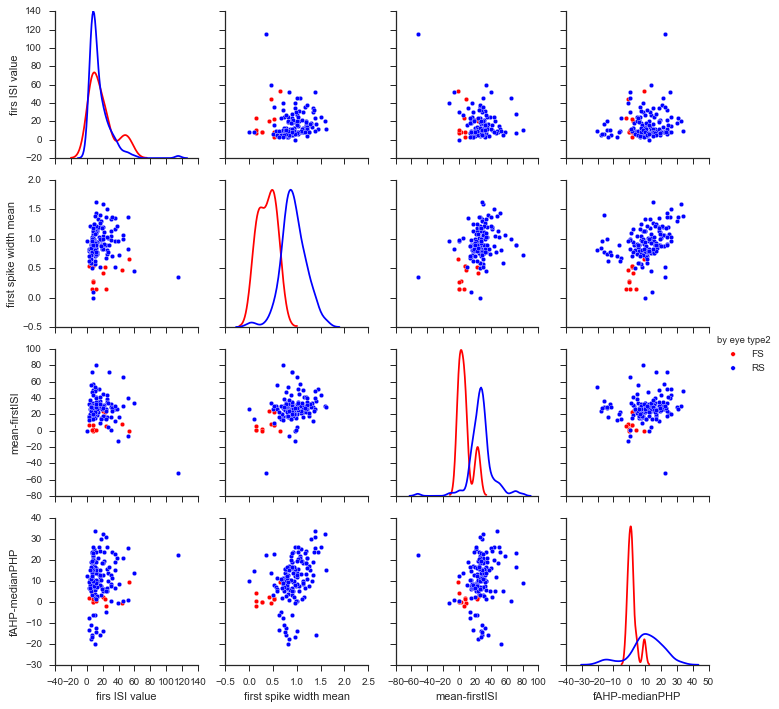

In [13]:
# I am ploting 4 variables (they have the more sense) in a pair plot 
sb.set(style="ticks", color_codes=True)

sb.pairplot(df, x_vars=[ 'firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP'], 
            y_vars=['firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP' ],
            hue='by eye type2',diag_kind='kde', palette=['red','blue'])


In [24]:
#only to show RS and BUR cells
FS=df[df['by eye type']=="FS"]
Bur=df[df['by eye type']=="RS"]
RS  =df[df['by eye type']=="BUR"] 
BRS=pd.concat([Bur,RS],axis=0)
FSall=pd.concat([BRS,FS],axis=0)
BRS.tail()

,﻿date,cell number,cczb or ivb file name form which I have took the data,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,...,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step,by eye type,by eye type2
129,20.06.2018,5,223ivb,0.0,4,41.80,37.80,1.140,0.830,-0.310,...,9.34,-46.84,56.18,-48.56,-37.40,-11.16,1,1,BUR,RS
131,21.06.2018,7,131ivb,0.0,28,100.00,72.00,0.980,0.890,-0.090,...,9.88,-54.38,64.26,-51.28,-42.05,-9.23,1,0,BUR,RS
141,26.07.2018,1,724ivb,0.0,10,63.00,53.00,0.713,0.818,0.105,...,12.35,-46.08,58.43,-47.61,-35.04,-12.57,1,0,BUR,RS
144,30.07.2018,4,652ivb,0.0,5,34.17,29.17,0.830,0.730,-0.100,...,10.69,-52.84,63.53,-57.05,-47.47,-9.58,1,1,BUR,RS
146,01.08.2018,5,443ivb,4.2,3,20.00,17.00,0.700,0.630,-0.070,...,4.76,-56.34,61.10,-61.88,-47.12,-14.76,1,0,BUR,RS


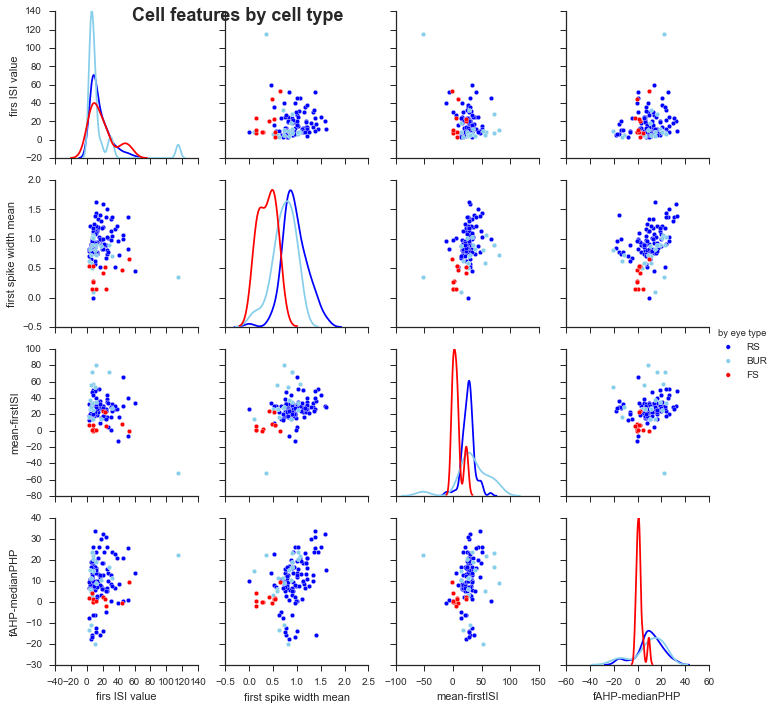

In [60]:
sb.set(style="ticks", color_codes=True)

sb.pairplot(FSall, x_vars=[ 'firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP'], 
            y_vars=['firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP' ],
            hue='by eye type',diag_kind='kde', palette=['blue','skyblue','red'])
plt.title('Cell features by cell type' ,position=(-2.3,3.2), fontname="Arial", fontweight="bold", fontsize=18, )
plt.savefig('cell_features.png', format="png")
plt.show()

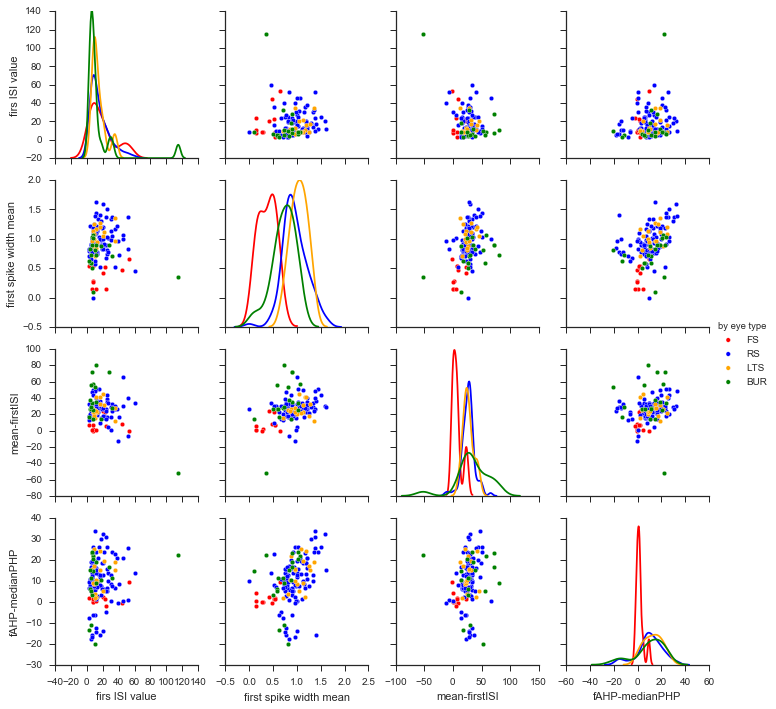

In [15]:
sb.set(style="ticks", color_codes=True)

sb.pairplot(df, x_vars=[ 'firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP'], 
            y_vars=['firs ISI value','first spike width mean','mean-firstISI',
       'fAHP-medianPHP' ],
            hue='by eye type',diag_kind='kde', palette=['red','green'])



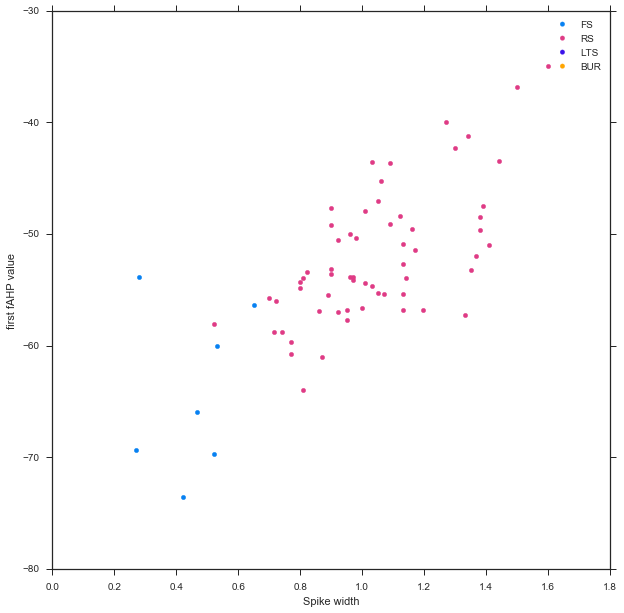

In [13]:
fig = plt.figure(figsize=(10,10))


for cell_type, color in [ ["FS", "#0781f2"], ["RS", "#df3b85"], ["LTS", "#3a12ea"], ["BUR", "orange"] ]:
    tdf = df1[df1['by eye type2'] == cell_type]
    plt.scatter( tdf['first spike width mean'],tdf['firts fAHP voltage value'], color=color, label=cell_type)

    plt.ylabel('first fAHP value')
    plt.xlabel('Spike width')
    plt.legend(loc='best')
    
plt.show()

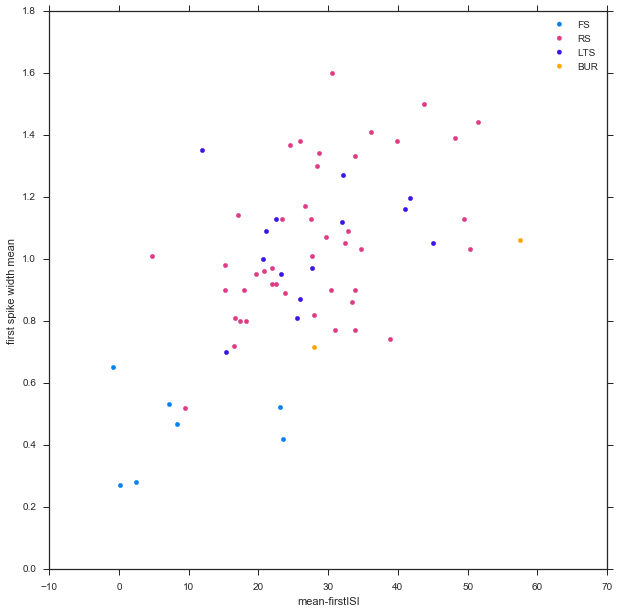

In [34]:
fig = plt.figure(figsize=(10,10))


for cell_type, color in [ ["FS", "#0781f2"], ["RS", "#df3b85"], ["LTS", "#3a12ea"], ["BUR", "orange"] ]:
    tdf = df1[df1['by eye type'] == cell_type]
    plt.scatter( tdf['mean-firstISI'],tdf['first spike width mean'], color=color, label=cell_type)

    plt.ylabel('first spike width mean')
    plt.xlabel('mean-firstISI')
    plt.legend(loc='best')
    
plt.show()

In [9]:
df_RS=df1[df1['by eye type'] =='RS']
df_FS=df1[df1['by eye type']=='FS']
print len (df_RS),len (df_FS)

44 7


In [10]:
df_RS2=df2[df2['by eye type'] =='RS']
df_FS2=df2[df2['by eye type']=='FS']
print len (df_RS2),len (df_FS2)

54 4


In [11]:
df_RS.describe()

,cell number,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,all spikes fAHP 5/2 s mean,all spikes MEDIAN PHP,fAHP-medianPHP,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,3.931818,17.363636,19.113636,47.153636,28.040000,1.662500,1.050591,-0.611818,-39.770227,-52.442045,12.671818,11.814318,-43.982045,-4.211818,-51.548182,-39.770227,-11.777955,0.022727,0.818182
std,2.424658,28.060641,11.168823,15.371354,10.707143,0.662399,0.245221,0.509040,11.429284,7.375416,10.037628,2.998550,5.816752,9.783332,5.883923,11.429284,7.348153,0.150756,0.390154
min,1.000000,-10.000000,3.000000,20.300000,4.680000,0.580000,0.520000,-2.000000,-60.700000,-65.760000,-15.680000,5.720000,-54.370000,-26.390000,-60.790000,-60.700000,-31.280000,0.000000,0.000000
25%,2.000000,0.000000,10.000000,35.522500,20.532500,1.215000,0.897500,-0.840000,-47.095000,-57.562500,6.385000,9.762500,-48.115000,-12.790000,-55.427500,-47.095000,-14.392500,0.000000,1.000000
50%,3.000000,5.000000,17.500000,47.000000,27.800000,1.600000,1.010000,-0.520000,-42.290000,-53.060000,9.540000,11.515000,-43.810000,-1.345000,-53.490000,-42.290000,-10.750000,0.000000,1.000000
75%,5.250000,20.000000,25.000000,58.347500,33.842500,1.880000,1.202500,-0.187500,-33.772500,-48.865000,19.215000,13.967500,-40.495000,2.512500,-48.325000,-33.772500,-6.597500,0.000000,1.000000
max,11.000000,100.000000,52.000000,91.800000,51.450000,3.600000,1.600000,-0.010000,-12.280000,-21.290000,33.540000,19.740000,-30.960000,9.600000,-34.980000,-12.280000,1.930000,1.000000,1.000000


In [12]:
df_FS.describe()

,cell number,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,all spikes fAHP 5/2 s mean,all spikes MEDIAN PHP,fAHP-medianPHP,all spike threshold value-PHP,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7,7.000000
mean,3.142857,-1.142857,22.642857,31.782857,9.140000,0.508286,0.448429,-0.060000,-59.890000,-61.914286,2.024286,12.017143,-50.488571,9.401429,-64.110000,-59.890000,-4.22000,0,0.285714
std,2.853569,16.405574,19.232599,21.183196,10.280237,0.169279,0.137874,0.043205,8.859105,8.691731,3.474578,5.872460,7.816579,8.185580,7.455792,8.859105,3.22542,0,0.487950
min,1.000000,-20.000000,2.500000,8.100000,-0.800000,0.300000,0.270000,-0.130000,-73.530000,-75.740000,-0.660000,4.290000,-59.970000,-3.520000,-73.530000,-73.530000,-8.70000,0,0.000000
25%,1.000000,-9.000000,8.000000,10.045000,1.290000,0.370000,0.350000,-0.085000,-66.345000,-67.025000,-0.085000,7.260000,-55.995000,3.895000,-69.545000,-66.345000,-6.17000,0,0.000000
50%,3.000000,0.000000,20.000000,43.570000,7.110000,0.514000,0.467000,-0.050000,-57.520000,-61.920000,1.400000,13.460000,-50.320000,12.570000,-65.950000,-57.520000,-3.47000,0,0.000000
75%,3.500000,0.000000,33.500000,49.175000,15.760000,0.632000,0.526000,-0.035000,-52.095000,-55.025000,2.050000,16.075000,-47.105000,15.745000,-58.165000,-52.095000,-2.51500,0,0.500000
max,9.000000,30.000000,53.000000,52.370000,23.570000,0.740000,0.650000,0.000000,-51.300000,-51.640000,9.500000,19.700000,-36.930000,17.480000,-53.870000,-51.300000,0.00000,0,1.000000


In [47]:
df_FS2.var()

cell number                                       7.333333
bridge error if applied                           0.821358
firs ISI value                                   61.666667
mean ISI value                                   95.014492
mean-firstISI                                    12.824492
all spikes mean spike width                       0.083908
first spike width mean                            0.036100
first -all spikes width                           0.009934
all spikes fAHP 5/2 s mean                       61.669800
all spikes MEDIAN PHP                            55.248225
fAHP-medianPHP                                    6.596292
all spike threshold value-PHP                     3.970425
all spikes mean spike thtrshold value            28.993267
spike threshold  -fAHP                           37.802425
firts fAHP voltage value                         40.946558
mean fAHP                                        61.669800
change                                            3.9836

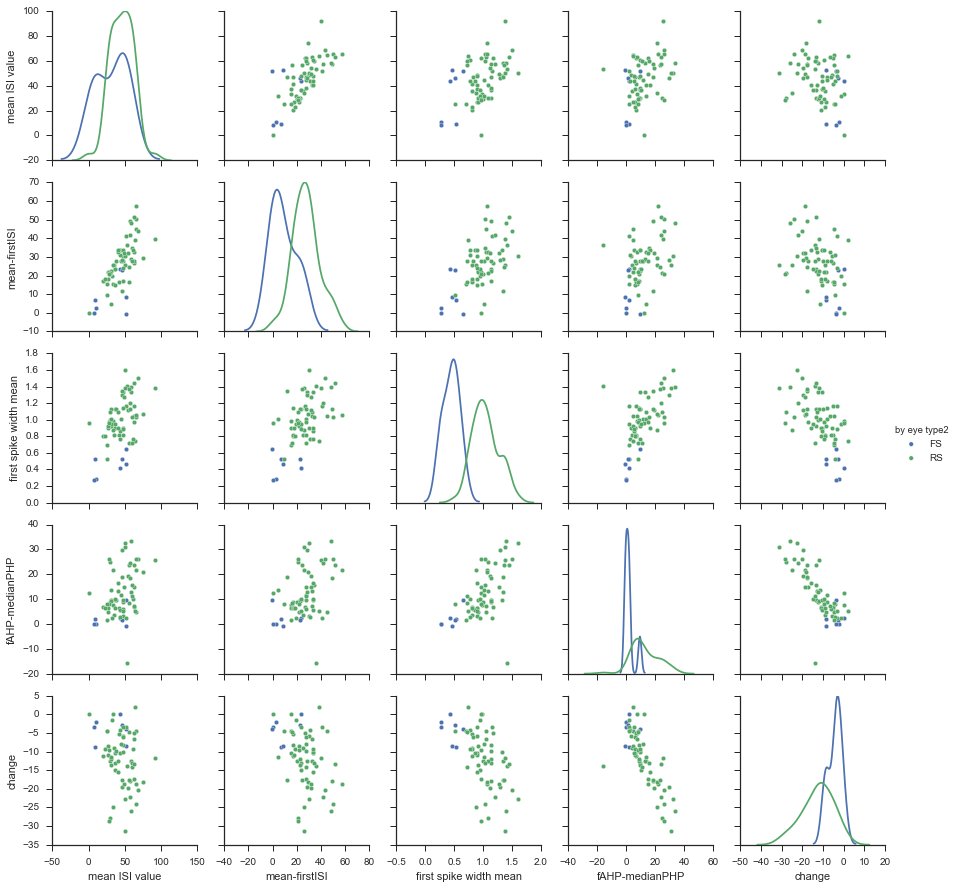

In [69]:
# I am ploting 5 variables (they have the more sense) in a pair plot 
sb.set(style="ticks", color_codes=True)
sb.pairplot(df1, x_vars=[  'mean ISI value',
       'mean-firstISI', 'first spike width mean','fAHP-medianPHP','change'],y_vars=[ 'mean ISI value',
       'mean-firstISI','first spike width mean','fAHP-medianPHP','change'],
            hue='by eye type2',diag_kind='kde')

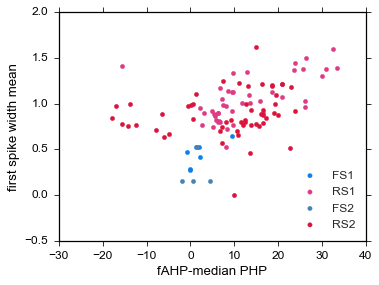

In [139]:

rcParams['figure.figsize'] =5.5,4.1 

for cell_type, color in [ ["FS", "#0781f2"], ["RS", "#df3b85"]]:
    tdf = df1[df1['by eye type'] == cell_type]
    plt.scatter( tdf['fAHP-medianPHP'],tdf['first spike width mean'], color=color, label=cell_type+'1')
for cell_type, color in [ ["FS", "steelblue"], ["RS", "crimson"]]:
    tdf = df2[df2['by eye type'] == cell_type]
    plt.scatter( tdf['fAHP-medianPHP'],tdf['first spike width mean'], color=color, label=cell_type+'2')
  
   
plt.ylabel('first spike width mean')
plt.xlabel('fAHP-median PHP')
plt.legend(loc='lower right')
    
plt.title=('Choosen cell properties') #, fontname="Arial", fontweight="bold", fontsize=16, va='bottom') 
#plt.savefig('scatter plot of cells.png', format="png")   

plt.show()

In [134]:
from matplotlib import rcParams
sb.axes_style('white')

sb.set_style("whitegrid", {'axes.axisbelow': True,
 'axes.edgecolor': '0',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '0',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '1',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '0',
 'xtick.direction': 'out',
 'xtick.major.size': 5,
 'xtick.minor.size': 0,
 'ytick.color': '0',
 'ytick.direction': 'out',
 'ytick.major.size': 5,
 'ytick.minor.size': 0})

sb.plotting_context('paper')

sb.set_context("paper",font_scale=1.5, rc= {'xtick.major.pad': 5 })

sb.set_palette("dark")

__This two plot above  shows distinction between groups done by eye looking at the shape of spikes, their fAHP amplitude, spiking frecquency(here it is presented using ISI) . It is ploted to see if anything obvious can be noticed (some clusters or any variables which charactrises groups better than other).__

looks like mean fAHP vs first spike width mean can good separate the FS vs other cell,

In next step I try to do PCA and cluster analysis


In [52]:
import sklearn.cluster as sk
import sklearn.preprocessing as sp
import sklearn.metrics as sm
import sklearn.decomposition as sd


In [53]:
#df=df.drop(df.index[28])
# this is a cell which was totally diferent in behaviour than the others, I treat it as outlier and cut it out

In [54]:
#df2.head(70)
#df2.dropna(axis=1)

In [70]:
numeric_df=df1[['mean-firstISI', 'first spike width mean','fAHP-medianPHP']]

#'mean ISI value','mean-firstISI', 'first spike width mean','fAHP-medianPHP','change']

# after a lot of tries I take in consideration these 5 features as 
#they can explain the varaibiity of data the best (adding some more features is not improving the analysis)

In [71]:
numeric_df=sp.scale(numeric_df)
# I scale the data "Center to the mean and component wise scale to unit variance".

In [72]:
print numeric_df[:10]


[[-1.35696241 -1.49333256 -1.05302085]
 [-0.80402963 -0.05983302 -0.45804891]
 [-0.24904389  0.41800015 -0.2371801 ]
 [ 0.232035   -0.31467739 -0.91880871]
 [-0.30721132 -0.2509663  -0.25197514]
 [-0.65963753 -0.63323284 -0.54047841]
 [-0.1019145  -0.60137729 -0.85751497]
 [-0.80813557 -0.31467739 -0.59226105]
 [ 0.96494465  0.51356679 -1.0118061 ]
 [-0.70754013 -0.60137729 -0.55738703]]


In [73]:
pca=sd.PCA()
pca.fit(numeric_df)
pca_data=pca.transform(numeric_df)

The best results in my opinion (based on my by eye assessment) are when  I picked a 5 variables only which seems to be meaningful,  scale them, perform PCA and then on pca transformed data cluster analysis. The small cluster (with 8 items in it) points to cell which according to my assessment are FS cells.

['PC1', 'PC2', 'PC3']
[ 70.1  20.1   9.8]


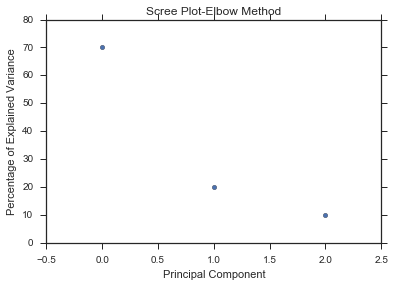

In [74]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
print labels
print per_var
 
plt.scatter(x=range(len(labels)),y=per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot-Elbow Method')
plt.show()





Seems I should have 3 clusters

In [75]:
kmeans = sk.KMeans(n_clusters=2).fit(pca_data)



In [76]:
# assessment of within cluster distance to centroid - sume of all points distance to the centroids - 
print kmeans.inertia_


116.87366519


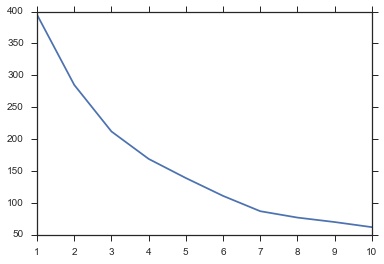

In [77]:
# I did this plot manually - I runed cluster analysis with different clusters number and wrote down the inertia 

inertia=[395, 285, 212, 169, 139, 111, 87,77, 70, 62]
Nb_of_clusters = [1,2,3,4,5,6,7,8,9,10]
plt.plot(Nb_of_clusters, inertia)
plt.show()

In [78]:
df['cluster']= kmeans.labels_

/Users/marta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
# look for the two most right columns
df2.head(70)

,﻿date,cell number,cczb or ivb file name form which I have took the data,bridge error if applied,firs ISI value,mean ISI value,mean-firstISI,all spikes mean spike width,first spike width mean,first -all spikes width,...,all spikes mean spike thtrshold value,spike threshold -fAHP,firts fAHP voltage value,mean fAHP,change,bursts presence,if more spikes at the beggining of each step,by eye type,by eye type2,cluster
69,07.04.2018,2,035ivb,0.00,46.00,111.85,65.85,1.120,1.000,-0.120,...,-51.55,3.51,-55.87,-55.06,-0.81,0,1,RS,RS,1
70,15.04.2018,4,751ivb,0.00,12.00,45.70,33.70,1.180,1.100,-0.080,...,-51.04,7.11,-60.14,-58.15,-1.99,0,1,RS,RS,0
71,18.04.2018,1,826ivb,29.00,52.00,45.00,-7.00,0.920,0.830,-0.090,...,-52.24,63.35,-53.69,-51.49,-2.20,0,0,RS,RS,0
72,19.04.2018,1,725ivb,22.00,29.90,30.32,0.42,1.400,0.980,-0.420,...,-37.95,45.48,-45.57,-33.91,-11.66,0,1,RS,RS,0
73,20.04.2018,4,328ivb,14.00,39.76,27.03,-12.73,1.200,0.970,-0.230,...,-46.17,59.81,-51.30,-39.13,-12.17,0,0,RS,RS,0
74,23.04.2018,3,033ivb,0.00,5.00,35.96,30.96,1.200,0.900,-0.300,...,-50.44,57.08,-58.32,-35.91,-22.41,0,1,RS,RS,1
75,24.04.2018,3,038ivb,0.00,5.00,36.71,31.71,0.900,0.760,-0.140,...,-42.09,52.60,-52.72,-36.05,-16.67,0,1,NaN,RS,1
76,25.04.2018,4,820ivb,0.00,6.00,34.15,28.15,0.580,0.970,0.390,...,-46.70,56.33,-53.13,-37.43,-15.70,0,1,LTS,RS,1
77,26.04.2018,1,839ivb,-5.10,14.00,36.61,22.61,1.240,1.190,-0.050,...,-47.89,72.24,-51.17,-48.66,-2.51,0,1,RS,RS,1
78,26.04.2018,2,849ivb,-5.20,14.00,48.60,34.60,1.207,1.210,0.003,...,-38.13,52.44,-46.65,-29.05,-17.60,0,1,RS,RS,1


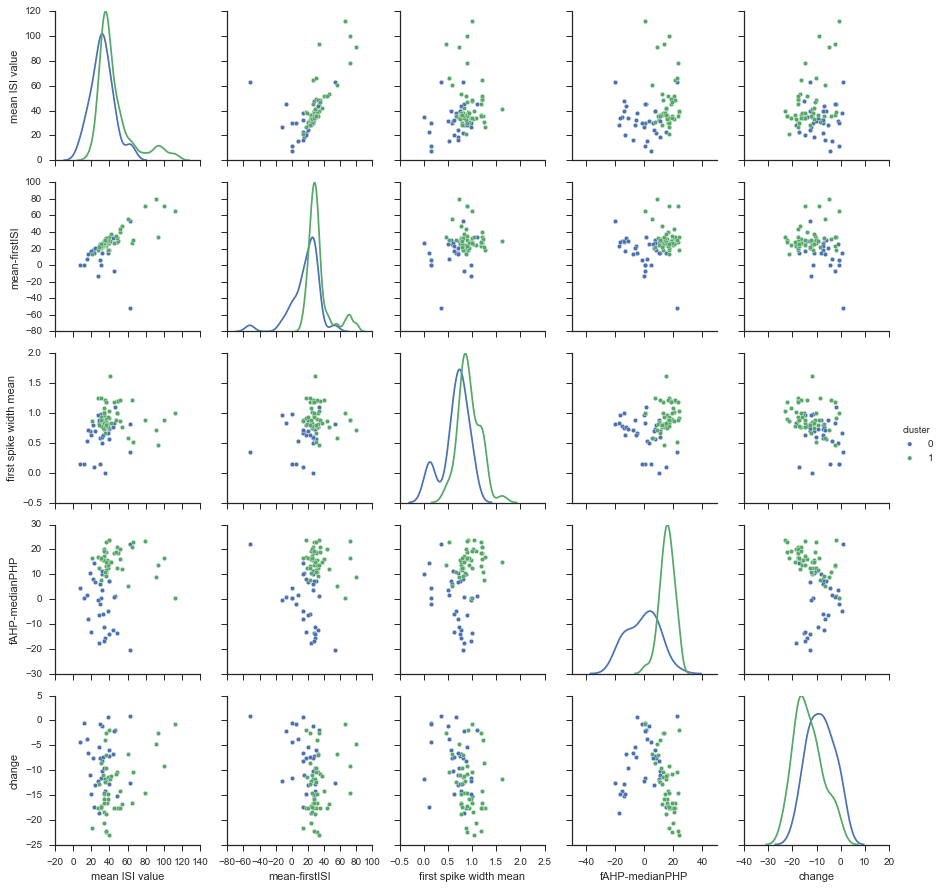

In [65]:
sb.pairplot(df2,  x_vars=[ 'mean ISI value',
       'mean-firstISI', 'first spike width mean','fAHP-medianPHP','change'],  y_vars=['mean ISI value',
       'mean-firstISI', 'first spike width mean','fAHP-medianPHP','change'], hue='cluster',diag_kind='kde')

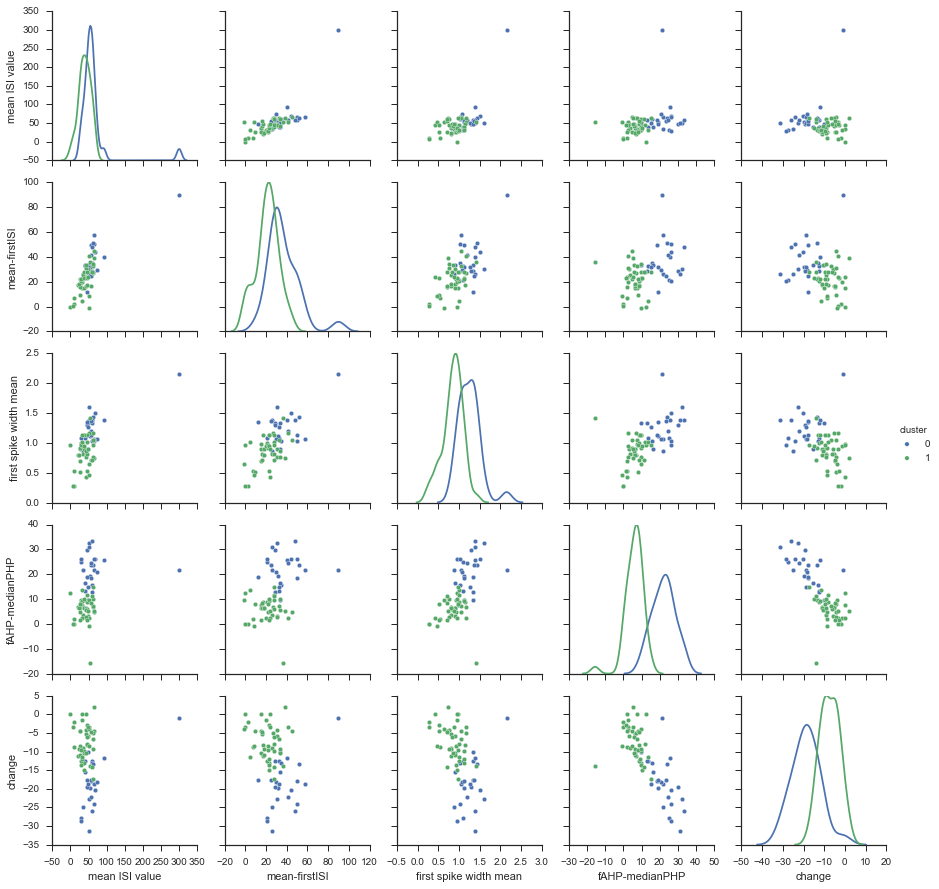

In [79]:
sb.pairplot(df1,  x_vars=[ 'mean ISI value',
       'mean-firstISI', 'first spike width mean','fAHP-medianPHP','change'],  y_vars=['mean ISI value',
       'mean-firstISI', 'first spike width mean','fAHP-medianPHP','change'], hue='cluster',diag_kind='kde')



example paper with k-means cluster analysis: https://www.nature.com/articles/nn.3974#abstract

In [24]:
# I have tried DBSCAN method to do cluster analysis but it is not better at all.

In [25]:
#dbscan=sk.DBSCAN(eps=1,min_samples=4).fit(pca_data)

In [26]:
#df.cluster=dbscan.labels_

In [27]:
#df.head(70)

In [28]:
#sb.pairplot(df, x_vars=[ 'firs ISI value','first spike width mean', 'mean-firstISI',
#       'firts fAHP voltage value', 'change'],  y_vars=['firs ISI value','first spike width mean', 'mean-firstISI',
#       'firts fAHP voltage value', 'change'], hue='cluster',diag_kind='kde')